In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Trending YouTube Video Statistics

YouTube sebagai situs video sharing mendaftarkan [top trending videos](https://www.youtube.com/feed/trending) pada platformnya. Menurut majalah Variety, "Untuk menentukan video paling trending, YouTube menggunakan kombinasi faktor termasuk mengukur interaksi pengguna (jumlah views, shares, comments, dan likes). Perlu diperhatikan bahwa video trending bukanlah video yang paling banyak dilihat secara keseluruhan". Kategori video yang biasa masuk sebagai trending YouTube adalah video musik, pertunjukan selebriti, reality show, dan video viral lainnya.

# Data Loading

Mari load dataset dari folder `data_input/USvideos`

- Data diperoleh dari [Kaggle: Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new) dalam bentuk file `.csv` yang merupakan data harian video trending YouTube di negara Amerika Serikat.
- Data diperoleh dengan cara scraping melalui YouTube API, kode dan tata cara mendapatkan data disediakan pada [GitHub Repository](https://github.com/mitchelljy/Trending-YouTube-Scraper).
- Data kemudian disimpan dalam bentuk file pickle untuk menghemat memory.

In [2]:
# load pickle file
youtube = pd.read_pickle("data_cache/USvideos")
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [3]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Deskripsi data:

- `video_id`: identifier unik untuk masing-masing video
- **`trending_date`: tanggal video masuk pada halaman trending, format: `yy.dd.mm`**
- **`title`: judul video**
- **`channel_title`: akun yang mengunggah video**
- **`category_id`: kategori video**
- **`publish_time`: tanggal video diunggah, format: `yyyy-mm-dd` disertain timezone**
- `tags`: kata kunci video
- **`views`, `likes`, `dislikes`, `comment_count`: statistik yang digunakan untuk menentukan trending video**
- `thumbnail_link`: link menuju thumbnail video
- `comments_disabled`: flag apakah comment pada video dinonaktifkan
- `ratings_disabled`: flag apakah tombol like/dislike dinonaktifkan
- `video_error_or_removed`: flag apakah video error atau telah dihapus
- `description`: teks deskripsi pada video

**Note**: deskripsi data yang di-bold adalah kolom yang digunakan pada analisis kali ini

# Data Preprocessing

Praktik yang baik sebelum melakukan analisis adalah untuk membersihkan data terlebih dahulu.

## Drop Irrelevant Columns

Menghapus kolom yang sekiranya tidak relevan dengan analisis.

In [4]:
drop_cols = ['tags', 'thumbnail_link', 'description']
youtube = youtube.drop(columns=drop_cols)
youtube.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed'],
      dtype='object')

## Replace `category_id`

Apabila diperhatikan, kolom `category_id` masih mengandung angka yang menunjukkan kategori video. Telah disediakan file berisi pemetaan dari `category_id` menjadi kategori video yang sesungguhnya pada `data_input/US_category_id.json`.

**Note**: jalankan cell code berikut untuk mendapatkan pemetaan `video_category`. Anda tidak perlu khawatir apabila tidak paham terkait code-nya. Intinya isi dari file json mirip dengan sebuah dictionary pada Python.

In [6]:
import json
with open("data_cache/US_category_id.json") as data_file:    
    data = json.load(data_file)  
    df = pd.json_normalize(data, record_path='items')
    df.index = df['id'].astype('int64')
    video_category = df['snippet.title'].to_dict()
video_category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

Mengubah kolom `category_id` menjadi `video_category`

In [7]:
video_category[22]

'People & Blogs'

In [8]:
youtube['video_category'] = youtube['category_id'].apply(lambda x: video_category[x])
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_category
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,748374,57527,2966,15954,False,False,False,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,2418783,97185,6146,12703,False,False,False,Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,3191434,146033,5339,8181,False,False,False,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,343168,10172,666,2146,False,False,False,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,2095731,132235,1989,17518,False,False,False,Entertainment


Menghapus kolom `category_id` karena sudah direpresentasikan oleh `video_category`

In [9]:
youtube = youtube.drop(columns='category_id')

## Convert Data Types

Anda telah mempelajari tipe data `datetime64` dan `category` pada course Exploratory Data Analysis (EDA). Silahkan ubah tipe data dari data `youtube` sebagai berikut:

In [10]:
# cek tipe data
youtube.dtypes
# dtypes -> attribute

video_id                  object
trending_date             object
title                     object
channel_title             object
publish_time              object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
video_category            object
dtype: object

- Kolom yang diubah menjadi tipe data `datetime64`: `trending_date` dan `publish_time`
- Kolom yang diubah menjadi tipe data `category`: `video_category` dan `channel_title`

In [11]:
# mengubah tipe data
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'], format='%y.%d.%m')
youtube['publish_time'] = pd.to_datetime(youtube['publish_time']).dt.tz_localize(None) # menghilangkan timezone

category_cols = ['video_category', 'channel_title']
youtube[category_cols] = youtube[category_cols].astype('category')

# Analysis

Yuk, sekarang kita mulai analisisnya, namun sebelum itu mari kita lihat range tanggal untuk mengetahui konteks datanya

In [12]:
youtube['trending_date'].describe()

C:\Users\stefa\anaconda3\envs\newton_dwv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   40949
unique                    205
top       2017-12-27 00:00:00
freq                      200
first     2017-11-14 00:00:00
last      2018-06-14 00:00:00
Name: trending_date, dtype: object

## Top Video Category

Pertama, kita penasaran apa saja **lima kategori video yang paling mendominasi halaman trending (berdasarkan banyaknya video)**? Setelah itu silahkan visualisasikan dengan tepat efektif!

<AxesSubplot:xlabel='video_category'>

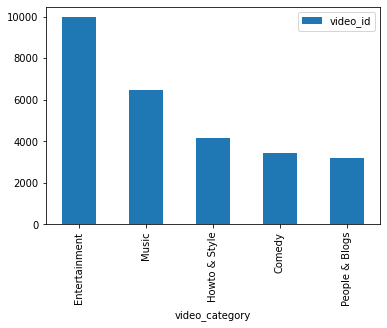

In [13]:
# top 5 kategori video yang paling banyak di halaman trending
# groupby, aggfunc = count

# bar vertikal
count_category = youtube.groupby('video_category').count()[['video_id']]
top5_category = count_category.sort_values('video_id', ascending=False).head()
top5_category.plot(kind='bar')

<AxesSubplot:ylabel='video_category'>

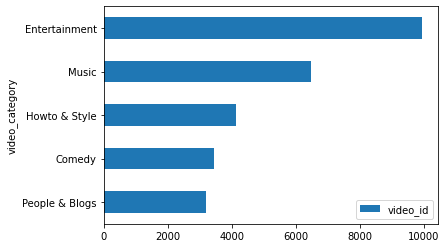

In [14]:
# bar horizontal
count_category.sort_values('video_id').tail().plot(kind='barh')

Insight: Ternyata kategori video yang paling banyak berada di halaman trending adalah Entertainment

Langkah selanjutnya silahkan lakukan **filter** terhadap data `youtube` hanya untuk kategori video tersebut untuk kebutuhan analisis tahap selanjutnya.

In [15]:
# filter data youtube dengan 1 kategori yang paling top saja
# conditional subsetting untuk video_category: youtube[kondisi]
youtube_ent = youtube[youtube['video_category'] == 'Entertainment']
youtube_ent

# note: kalau ingin selain entertainment gunakan !=

,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_category
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,Entertainment
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,Entertainment
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,2017-11-12 05:37:17,2103417,15993,2445,1970,False,False,False,Entertainment
11,VifQlJit6A0,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,2017-11-13 03:00:00,104578,1576,303,1279,False,False,False,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40930,wI89nVn6LHk,2018-06-14,Maddie Poppe Wins American Idol 2018 - Finale ...,American Idol,2018-05-22 04:08:24,2003345,19895,2831,3481,False,False,False,Entertainment
40932,tiF9SzzzX_o,2018-06-14,The Voice 2018 Brynn Cartelli - Finale: Skyfall,The Voice,2018-05-22 02:34:39,1437051,19930,1794,1671,False,False,False,Entertainment
40934,Qcj15vHJTtk,2018-06-14,Royal Wedding - SNL,Saturday Night Live,2018-05-20 04:58:51,8607264,66559,14179,8382,False,False,False,Entertainment
40940,_QWZvU7VCn8,2018-06-14,Brad Pitt Bid $120k For A Night With Emilia Cl...,The Graham Norton Show,2018-05-18 17:13:08,5564576,46351,2295,2861,False,False,False,Entertainment


## Likes per View Distribution for Top Video Category

Untuk bagian ini, mari kita mereplikasi boxplot berikut untuk menjawab business question:

> Bagaimana persebaran nilai rata-rata rasio `likes` per `views` untuk masing-masing `channel_title` (pada top video category saja) berdasarkan periode bulanan (`year-month`) tanggal trendingnya?

![](assets/youtube_boxplot.png)

Note: satu titik data merepresentasi satu `channel_title`, nilainya merupakan rata-rata `likes` per `views`

Langkah:

1. Membuat kolom baru: `trending_period` dan `likes_per_view`
2. Tabel agregasi untuk menampilkan rata-rata `likes_per_view` untuk masing-masing `channel_title` dan `trending_period`
3. Visualisasikan sebaran data tersebut, lalu gunakan untuk mengidentifikasi `channel_title` apa yang memiliki rata-rata rasio `likes` per `views` terbesar untuk keseluruhan `trending_period`

In [16]:
# membuat kolom baru
youtube_ent['trending_period'] = youtube_ent['trending_date'].dt.to_period('M')
youtube_ent['likes_per_view'] = youtube_ent['likes']/youtube_ent['views']
youtube_ent.head()

C:\Users\stefa\anaconda3\envs\newton_dwv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\stefa\anaconda3\envs\newton_dwv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,video_id,trending_date,title,channel_title,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,video_category,trending_period,likes_per_view
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,Entertainment,2017-11,0.040179
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,Entertainment,2017-11,0.029641
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,Entertainment,2017-11,0.063097
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,2017-11-12 05:37:17,2103417,15993,2445,1970,False,False,False,Entertainment,2017-11,0.007603
11,VifQlJit6A0,2017-11-14,(SPOILERS) 'Shiva Saves the Day' Talked About ...,amc,2017-11-13 03:00:00,104578,1576,303,1279,False,False,False,Entertainment,2017-11,0.015070


In [17]:
youtube_ent.groupby(['channel_title', 'trending_period']).mean()[['likes_per_view']]

likes_per_view
channel_title          trending_period                
12 News                2017-11                     NaN
                       2017-12                     NaN
                       2018-01                     NaN
                       2018-02                     NaN
                       2018-03                     NaN
...                                                ...
영국남자 Korean Englishman 2018-02                     NaN
                       2018-03                     NaN
                       2018-04                     NaN
                       2018-05                     NaN
                       2018-06                     NaN

[17656 rows x 1 columns]

In [18]:
# tabel agregasi: rata-rata likes per view dikelompokkan berdasarkan channel title dan trending period
youtube_ent_monthly = youtube_ent.groupby(['channel_title', 'trending_period'])[['likes_per_view']].mean().dropna()
youtube_ent_monthly

likes_per_view
channel_title         trending_period                
1MILLION Dance Studio 2018-02                0.046014
                      2018-03                0.061227
                      2018-04                0.079337
5MadMovieMakers       2017-12                0.020707
                      2018-01                0.011377
...                                               ...
truTV                 2017-12                0.013991
                      2018-03                0.015109
                      2018-04                0.015434
voordeel              2017-12                0.110516
                      2018-01                0.087040

[1055 rows x 1 columns]

<AxesSubplot:title={'center':'likes_per_view'}, xlabel='trending_period'>

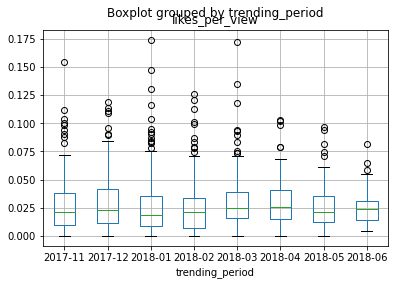

In [19]:
# visualisasi
# column: kolom numeriknya
# by: boxplot ingin dipisahkan berdasarkan kolom apa
youtube_ent_monthly.boxplot(column = 'likes_per_view', by = 'trending_period')

In [20]:
# identifikasi outlier paling terluar/ekstrim: ingin ambil 2018-01
# key: kolom/baris apa yang ingin diambil
# level: level apa yang ingin diambil
# axis: 0 untuk baris dan 1 untuk kolom
youtube_ent_monthly.xs(key = '2018-01', level = 'trending_period', axis = 0).sort_values('likes_per_view', ascending=False)

,likes_per_view
channel_title,
Amber Liu,0.174057
Caspar,0.147213
CaptainDisillusion,0.129984
danisnotinteresting,0.116138
Natalies Outlet,0.104031
...,...
KIND Snacks,0.000477
Any rubbish,0.000428
Geoff Mallinson,0.000418


In [21]:
# additional: mengetahui video apa yang dimaksud


# Selamat!

Jika Anda telah mencapai bagian ini berarti Anda telah menyelesaikan sebagian besar konsep untuk materi Data Wrangling and Visualization.

Kami tahu bahwa Anda sangat ingin latihan secara mandiri dan memiliki banyak pertanyaan untuk dijawab.

Jadi, kami telah membuat cell khusus di bawah ini untuk Anda melakukan eksplorasi mandiri terhadap dataset.

Rumuskan setidaknya satu pertanyaan bersama dengan kode dan insight yang diperoleh.

Kami tidak sabar untuk melihat hasil analisis Anda ~

> Pertanyaan: ...

In [22]:
# lakukan eksplorasi di sini


Teknik yang wajib dipahami:

- Conditional subsetting: `data[kondisi]`
- Sorting tabel: `.sort_values()`
- Tabel agregasi: `.groupby()` dan `.agg()`
- Tipe visualisasi: bar chart, grouped bar chart, box plot
- MultiIndex DataFrame subsetting: cross-section `.xs()`
- Reshaping: `.stack()` vs `.unstack()`

Teknik yang dapat dieksplorasi lebih lanjut di luar kelas:

- Menghitung selisih antar dua waktu (`timedelta`)
- Tipe visualisasi: histogram, density plot, scatter plot, hex bin plot
- Library visualisasi lainnya: `seaborn`, `plotly`, `altair`